In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv("orthorhombic_dataset.csv")
dataset.head(n=10)

,Solids,rA,rB,rX,vA,vB,vX,EA,EB,EX,a,b,c
0,NaUO3,1.02,0.760,1.35,1,5,-2,0.93,1.38,3.44,5.775,5.905,8.250
1,NaTaO3,1.02,0.640,1.35,1,5,-2,0.93,1.50,3.44,5.494,5.513,7.751
2,NaNbO3,1.02,0.640,1.35,1,5,-2,0.93,1.60,3.44,5.510,5.570,7.770
3,NaPaO3,1.02,0.780,1.35,1,5,-2,0.93,1.50,3.44,5.820,5.920,8.360
4,CaMnO3,1.00,0.530,1.35,2,4,-2,1.00,1.55,3.44,5.270,5.275,7.464
5,CaCrO3,1.00,0.550,1.35,2,4,-2,1.00,1.66,3.44,5.287,5.316,7.486
6,CaVO3,1.00,0.580,1.35,2,4,-2,1.00,1.63,3.44,5.326,5.352,7.547
7,CaTiO3,1.00,0.605,1.35,2,4,-2,1.00,1.54,3.44,5.381,5.443,7.645
8,CaRuO3,1.00,0.620,1.35,2,4,-2,1.00,2.20,3.44,5.360,5.530,7.670
9,CaMoO3,1.00,0.650,1.35,2,4,-2,1.00,2.16,3.44,5.450,5.580,7.800


In [3]:
x = dataset.iloc[:,1:10].values
y = dataset.iloc[:,10:].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
grid_para={'C':[0.01, 0.1, 1, 5, 10, 50, 100, 150, 200], 'epsilon':np.arange(0.05, 1, 0.05), 'gamma':np.arange(0, 10, 0.25)}

In [7]:
#########################################             for a           ##############################################

#GridSearchCV
a1 = np.zeros(8)
for i in range(2, 10):
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'), param_grid = grid_para, scoring='r2', n_jobs=-1, cv=i)
    gd_sr.fit(x_train, y_train[:,0])
    best_para1 = gd_sr.best_params_
    best_result1 = gd_sr.best_score_
    a1[i-2] = best_result1
    #print("No. of folds: ",i)
    #print("Best parameter value: ",best_para1)
    #print("Best score for a:",best_result1)
    print(f'Best scores for {i} fold cv is {best_result1} with corresponding parameter values as {best_para1}')

Best scores for 2 fold cv is 0.9392325973819466 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 3 fold cv is 0.942180497226789 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 4 fold cv is 0.9461128527802725 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 5 fold cv is 0.9541766183686576 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 6 fold cv is 0.9511709764842262 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 7 fold cv is 0.9501959881796225 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 8 fold cv is 0.9357490237978818 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 9 fold cv is 0.9388758863170401 with corresponding parameter values as {'C': 50, '

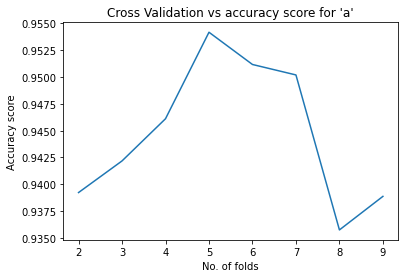

In [8]:
#print(a1)
plt.plot(np.arange(2,10,1), a1)
plt.title("Cross Validation vs accuracy score for 'a'")
plt.xlabel("No. of folds")
plt.ylabel("Accuracy score")
plt.show()

In [9]:
a2 = np.zeros(8)
for i in range(2, 10):
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'), param_grid = grid_para, scoring='r2', n_jobs=-1, cv=i)
    gd_sr.fit(x_train, y_train[:,1])
    best_para2 = gd_sr.best_params_
    best_result2 = gd_sr.best_score_
    a2[i-2] = best_result2
    #print("No. of folds: ",i)
    #print("Best parameter value: ",best_para2)
    #print("Best score for a:",best_result2)
    print(f'Best scores for {i} fold cv is {best_result2} with corresponding parameter values as {best_para2}')

Best scores for 2 fold cv is 0.7915159160082854 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 3 fold cv is 0.8000323225125733 with corresponding parameter values as {'C': 10, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 4 fold cv is 0.792401306088506 with corresponding parameter values as {'C': 100, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 5 fold cv is 0.7892002553128032 with corresponding parameter values as {'C': 10, 'epsilon': 0.05, 'gamma': 1.5}
Best scores for 6 fold cv is 0.7393220041808987 with corresponding parameter values as {'C': 10, 'epsilon': 0.05, 'gamma': 0.75}
Best scores for 7 fold cv is 0.7503866237858885 with corresponding parameter values as {'C': 10, 'epsilon': 0.05, 'gamma': 1.0}
Best scores for 8 fold cv is 0.6978681491247964 with corresponding parameter values as {'C': 200, 'epsilon': 0.05, 'gamma': 9.75}
Best scores for 9 fold cv is 0.7480794198415921 with corresponding parameter values as {'C': 150, 

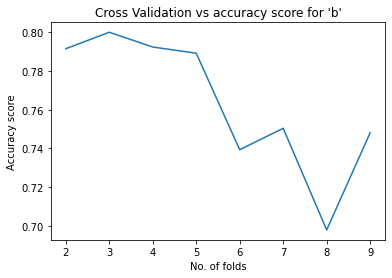

In [10]:
#print(a1)
plt.plot(np.arange(2,10,1), a2)
plt.title("Cross Validation vs accuracy score for 'b'")
plt.xlabel("No. of folds")
plt.ylabel("Accuracy score")
plt.show()

In [11]:
a3 = np.zeros(8)
for i in range(2, 10):
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'), param_grid = grid_para, scoring='r2', n_jobs=-1, cv=i)
    gd_sr.fit(x_train, y_train[:,2])
    best_para3 = gd_sr.best_params_
    best_result3 = gd_sr.best_score_
    a3[i-2] = best_result3
    #print("No. of folds: ",i)
    #print("Best parameter value: ",best_para3)
    #print("Best score for a:",best_result3)
    print(f'Best scores for {i} fold cv is {best_result3} with corresponding parameter values as {best_para3}')

Best scores for 2 fold cv is 0.9218601618078848 with corresponding parameter values as {'C': 100, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 3 fold cv is 0.9276492259837822 with corresponding parameter values as {'C': 100, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 4 fold cv is 0.9074120945633385 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
Best scores for 5 fold cv is 0.9318801495552229 with corresponding parameter values as {'C': 100, 'epsilon': 0.05, 'gamma': 6.0}
Best scores for 6 fold cv is 0.9038078035416969 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.5}
Best scores for 7 fold cv is 0.9159363732480867 with corresponding parameter values as {'C': 100, 'epsilon': 0.05, 'gamma': 0.5}
Best scores for 8 fold cv is 0.8740659510294311 with corresponding parameter values as {'C': 50, 'epsilon': 0.05, 'gamma': 0.75}
Best scores for 9 fold cv is 0.8911022027805718 with corresponding parameter values as {'C': 100

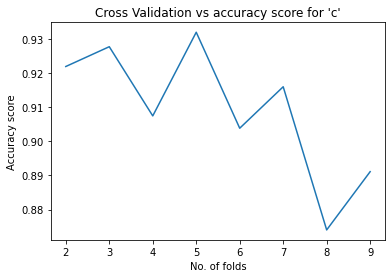

In [12]:
#print(a1)
plt.plot(np.arange(2,10,1), a3)
plt.title("Cross Validation vs accuracy score for 'c'")
plt.xlabel("No. of folds")
plt.ylabel("Accuracy score")
plt.show()

In [13]:
print(np.mean(a1))
print(np.mean(a2))
print(np.mean(a3))

0.9447118050670545
0.7636007496069179
0.909214245313752


In [14]:
#With maximum accuracy score and corresponding parameter value

reg1 = SVR(kernel='rbf', C=50, epsilon=0.05, gamma=0.25)
f1 = reg1.fit(x_train,y_train[:,0])
ypred1 = f1.predict(x_test)
#print(np.shape(f1.predict(x_train)))
print("Training data error :", np.mean(np.abs(y_train[:,0]-f1.predict(x_train))*100/y_train[:,0]))

Training data error : 0.4246225534347573


In [15]:
#with mean accuracy and mean parameter value

reg1 = SVR(kernel='rbf', C=50, epsilon=0.05, gamma=0.25)
f1 = reg1.fit(x_train,y_train[:,0])
ypred1 = f1.predict(x_test)
#print(np.shape(f1.predict(x_train)))
print("Training data error :", np.mean(np.abs(y_train[:,0]-f1.predict(x_train))*100/y_train[:,0]))

Training data error : 0.4246225534347573


In [16]:
#With maximum accuracy score and corresponding parameter value


reg2 = SVR(kernel='rbf', C=10, epsilon=0.05, gamma=0.25)
f2 = reg2.fit(x_train,y_train[:,1])
ypred2 = f2.predict(x_test)
print("Training data error :", np.mean(np.abs(y_train[:,1]-f2.predict(x_train))*100/y_train[:,1]))

Training data error : 0.8776207104521161


In [17]:
#with mean accuracy and mean parameter value

reg2 = SVR(kernel='rbf', C=67.5, epsilon=0.05, gamma=1.75)
f2 = reg2.fit(x_train,y_train[:,1])
ypred2 = f2.predict(x_test)
print("Training data error :", np.mean(np.abs(y_train[:,1]-f2.predict(x_train))*100/y_train[:,1]))

Training data error : 0.8069595549260664


In [18]:
#With maximum accuracy score and corresponding parameter value


reg3 = SVR(kernel='rbf', C=100, epsilon=0.05, gamma=6.0)
f3 = reg3.fit(x_train,y_train[:,2])
ypred3 = f3.predict(x_test)
print("Training data error :", np.mean(np.abs(y_train[:,2]-f3.predict(x_train))*100/y_train[:,2]))

Training data error : 0.47253920172455055


In [19]:
#with mean accuracy and mean parameter value

reg3 = SVR(kernel='rbf', C=81.25, epsilon=0.05, gamma=1.125)
f3 = reg3.fit(x_train,y_train[:,2])
ypred3 = f3.predict(x_test)
print("Training data error :", np.mean(np.abs(y_train[:,2]-f3.predict(x_train))*100/y_train[:,2]))

Training data error : 0.5527236939907271


In [20]:
#ypred = np.hstack((np.hstack((ypred1.reshape(-1,1), ypred2.reshape(-1,1))), ypred3.reshape(-1,1)))
ypred = np.hstack((ypred1.reshape(-1,1), ypred2.reshape(-1,1), ypred3.reshape(-1,1)))
#print(ypred)

In [21]:
error = abs((y_test-ypred)*100/y_test)
print("Testing data error in a:", np.mean(error[:,0]))
print("Testing data error in b:", np.mean(error[:,1]))
print("Testing data error in c:", np.mean(error[:,2]))

Testing data error in a: 0.36093508356506926
Testing data error in b: 0.9053884792550415
Testing data error in c: 0.7109876059105141


In [22]:
print("R2 for test data for 'a' is ",reg1.score(x_test, y_test[:,0]))
print("R2 for test data for 'b' is ",reg2.score(x_test, y_test[:,1]))
print("R2 for test data for 'c' is ",reg3.score(x_test, y_test[:,2]))

R2 for test data for 'a' is  0.9727324277496395
R2 for test data for 'b' is  0.7733593089662094
R2 for test data for 'c' is  0.9025787752663601


In [23]:
print("R2 for train data for 'a' is ",reg1.score(x_train, y_train[:,0]))
print("R2 for train data for 'b' is ",reg2.score(x_train, y_train[:,1]))
print("R2 for train data for 'c' is ",reg3.score(x_train, y_train[:,2]))

R2 for train data for 'a' is  0.9762821692566473
R2 for train data for 'b' is  0.894315672654229
R2 for train data for 'c' is  0.9587198939143792


In [48]:
print("Training data error in 'a':", np.mean(np.abs(y_train[:,0]-f1.predict(x_train))*100/y_train[:,0]))
print("Training data error in 'b':", np.mean(np.abs(y_train[:,1]-f2.predict(x_train))*100/y_train[:,1]))
print("Training data error in 'c':", np.mean(np.abs(y_train[:,2]-f3.predict(x_train))*100/y_train[:,2]))

Training data error in 'a': 0.4246225534347573
Training data error in 'b': 0.8069595549260664
Training data error in 'c': 0.5527236939907271


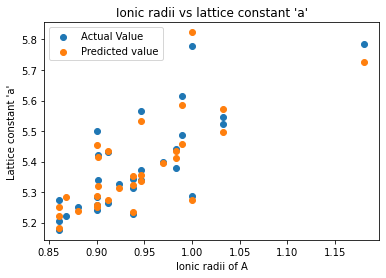

In [44]:
s1 = plt.scatter(x_test[:,0],y_test[:,0])
s2 = plt.scatter(x_test[:,0],ypred[:,0])
plt.legend((s1, s2),('Actual Value','Predicted value'))
plt.title("Ionic radii of A vs lattice constant 'a'")
plt.xlabel("Ionic radii of A")
plt.ylabel("Lattice constant 'a'")
plt.show()

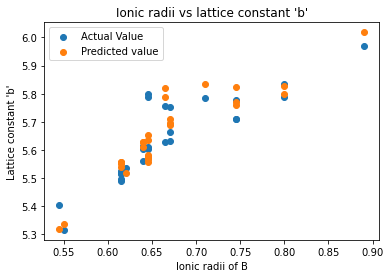

In [45]:
s3 = plt.scatter(x_test[:,1],y_test[:,1])
s4 = plt.scatter(x_test[:,1],ypred[:,1])
plt.legend((s1, s2),('Actual Value','Predicted value'))
plt.title("Ionic radii of B vs lattice constant 'b'")
plt.xlabel("Ionic radii of B")
plt.ylabel("Lattice constant 'b'")
plt.show()

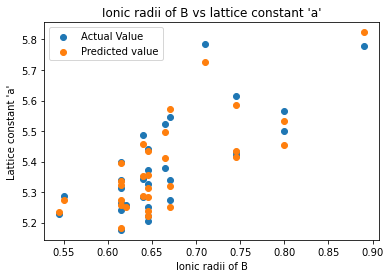

In [49]:
s5 = plt.scatter(x_test[:,1],y_test[:,0])
s6 = plt.scatter(x_test[:,1],ypred[:,0])
plt.legend((s5, s6),('Actual Value','Predicted value'))
plt.title("Ionic radii of B vs lattice constant 'a'")
plt.xlabel("Ionic radii of B")
plt.ylabel("Lattice constant 'a'")
plt.show()

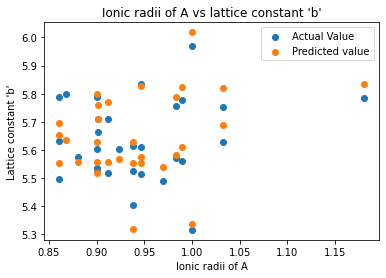

In [50]:
s7 = plt.scatter(x_test[:,0],y_test[:,1])
s8 = plt.scatter(x_test[:,0],ypred[:,1])
plt.legend((s7, s8),('Actual Value','Predicted value'))
plt.title("Ionic radii of A vs lattice constant 'b'")
plt.xlabel("Ionic radii of A")
plt.ylabel("Lattice constant 'b'")
plt.show()

In [28]:
np.savetxt('x_train.csv', x_train, delimiter=',', fmt='%6f')

In [29]:
np.savetxt('x_test.csv', x_test, delimiter=',', fmt='%6f')

In [30]:
np.savetxt('y_train.csv', y_train, delimiter=',', fmt='%6f')

In [31]:
np.savetxt('y_test.csv', y_test, delimiter=',', fmt='%6f')